# TME3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted : 
 - given a regular grid, a sampling of a continuous 2D signal can be modelled as follow:
$$
x_e(t,u) = x(t,u)e(t,u)\quad \text{with}\quad e(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_e,u - lT_e)
$$ $e$ is the analog of Dirac comb in 2D
 - spectrum of $x_e$ writes:
$$
X_e(f,g) = \frac1{T_e^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_e,g-lf_e)
$$
2D sampling then implies a periodisation of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if 2D Shannon condition is verified (band limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_e(kT_e,lT_e) \operatorname{sinc}(\pi f_e (t-kT_e)) \operatorname{sinc}(\pi f_e(u - lTe))\qquad\qquad\qquad\text{(1)}
$$
so called Shannon interpolation.
 
## Exercice 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div>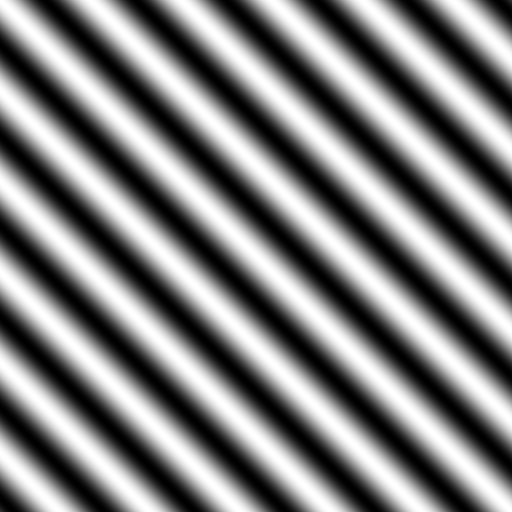</div>
The goal of this exercice is to study the limit conditions of sampling of this image in order to avoid aliasing.



In [2]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
%matplotlib notebook 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Te, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Te-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Te-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    %matplotlib notebook
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    fig.show()

def computeFT(I):
    """ Array -> Array[complex] """
    return np.fft.fft2(I)
def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return np.abs(np.fft.fftshift(If))
def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return np.log(1+np.abs(np.fft.fftshift(If)))

def thresholdImage(I,s):
    """ Array*int -> Array """
    J = np.copy(I)
    J = np.where(J>=s,255,0)
    return J

def showIma(I):
    plt.figure()
    plt.gray()
    plt.imshow(I)
    plt.show()

1. We provide the function `sinusoid2d(A, theta, L, T0, Te)` that allows to sample signal $s_\theta$ with a sampling period of `Te` (the grid is regular with the sample sampling value for directions $u$ and $t$). Paremeters `A`, `theta`, `L` and `T0` respectively control the amplitude, orientation and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `T_e=1`.

<IPython.core.display.Javascript object>


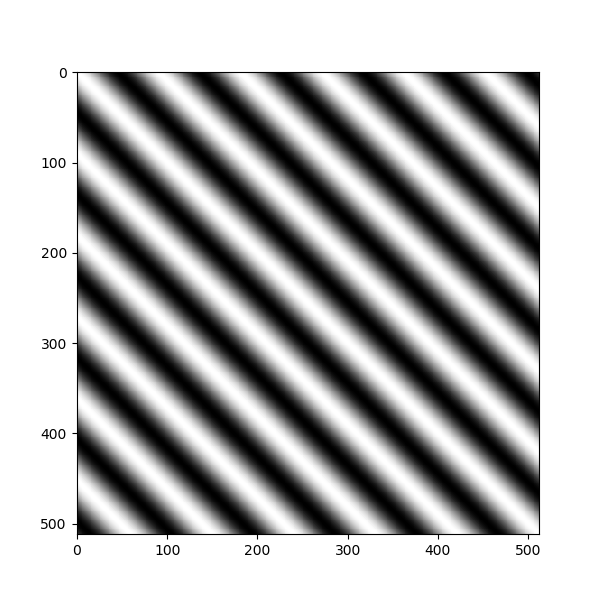

In [40]:
# initialise signal

s45 = sinusoid2d(1,45,512,64,1)
imshow(s45)

2. What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ is the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

In direction t (let that be horizontal), $f_t^{\text{max}}$ equals $f_0*cos(\theta)$, 
> whereas in direction u (let that be vertical), $f_u^{\text{max}}$ equals $f_0*sin(\theta)$.

$\theta$ is a very lucky value since its cosine is equals to its sine, which means that $f_u^{\text{max}}$ = $f_t^{\text{max}}$ = $f_m$ = $\frac{\sqrt2}{2}$.

This limit frequency has to be multiplied by a factor of 2 (Nyquist frequency) in order to get a valid sampling. Indeed, we need the sampling function to allow the computation of its Fourier Transform without interferences between the FT replicas.

2. (a)  Sample $s_{45}$ with $f_e = 16 f_m$ and display the sampled signal.

<IPython.core.display.Javascript object>


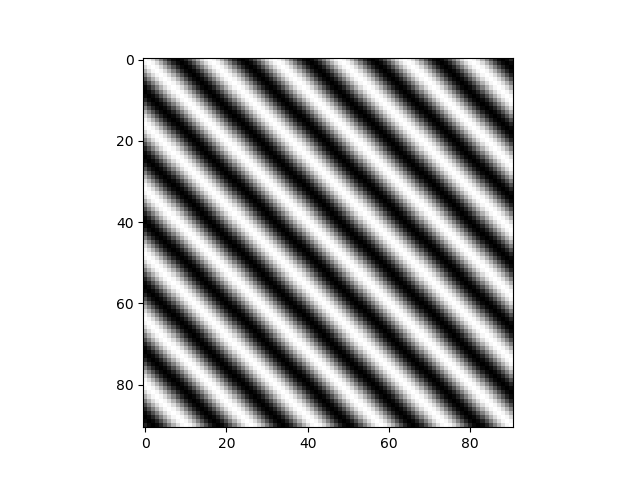

In [86]:
t0 = 64 # fundamental period           
f0 = 1/t0 # fundamental frequency          
fm = f0*np.sqrt(2)/2 # maximal frequency
fe = 16*fm # sampling frequency

# 16fm-sampled signal
s45e16 = sinusoid2d(1,45,512,t0,1/fe)
showIma(s45e16)

2. (b) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

<IPython.core.display.Javascript object>


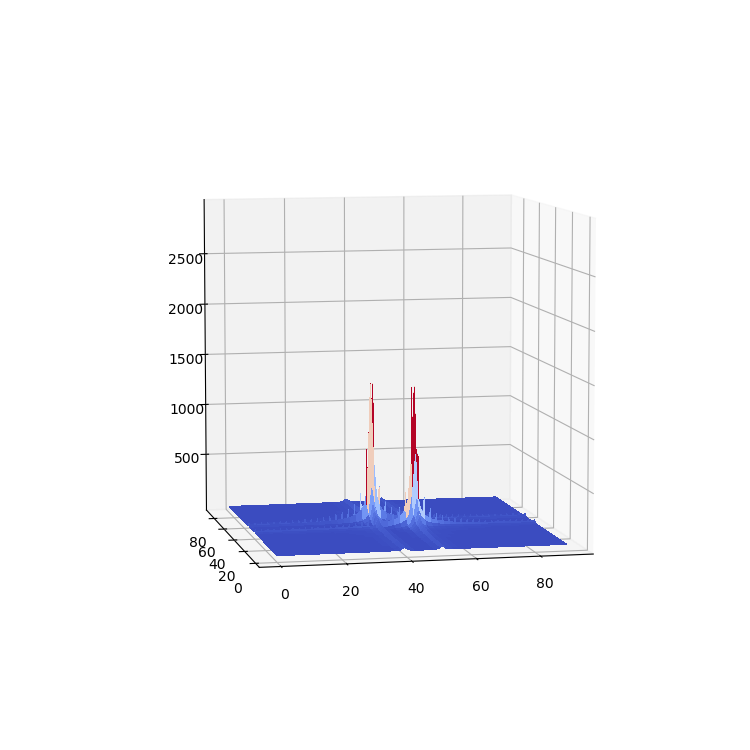

In [90]:
# 16fm sampled signal - Fourier spectrum
fts45e16 = computeFT(s45e16)
surf(toVisualizeFT(fts45e16))

3. (c) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_e$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of theses differences?
    - (Bonus question):
        - Why, aside the two Dirac peaks, there are somes structures? Explain the origin of these lobes.
        - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfer.

<IPython.core.display.Javascript object>


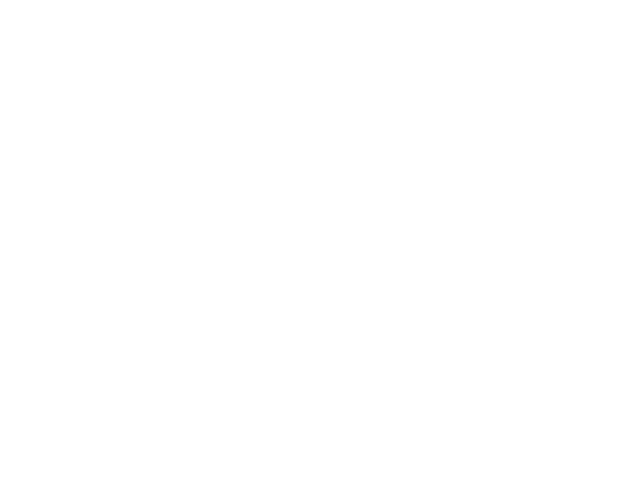

<IPython.core.display.Javascript object>


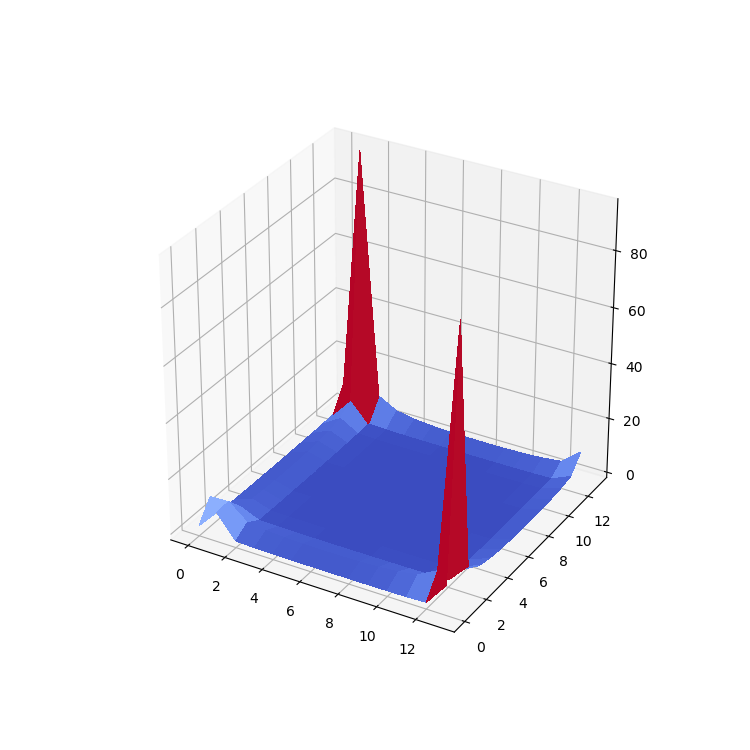

In [91]:
# Batch of Te variations - ep.1 : fe = 2.3fm
# 2*fm is the limit frequency according to Shannon's rule. We hence use a slightly higher coefficient.
# 2.3fm sampled signal
fe = 2.3*fm
s45e2 = sinusoid2d(1,45,512,t0,1/fe)
showIma(s45e2)

# 2.3fm sampled signal - Fourier spectrum
fts45e2 = computeFT(s45e2)
surf(toVisualizeFT(fts45e2))

<IPython.core.display.Javascript object>


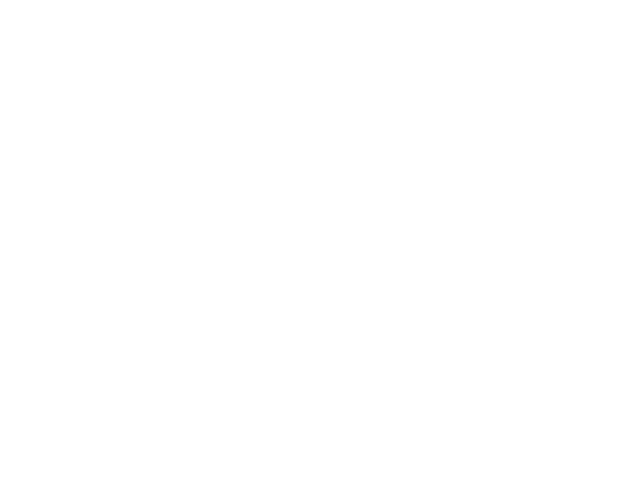

<IPython.core.display.Javascript object>


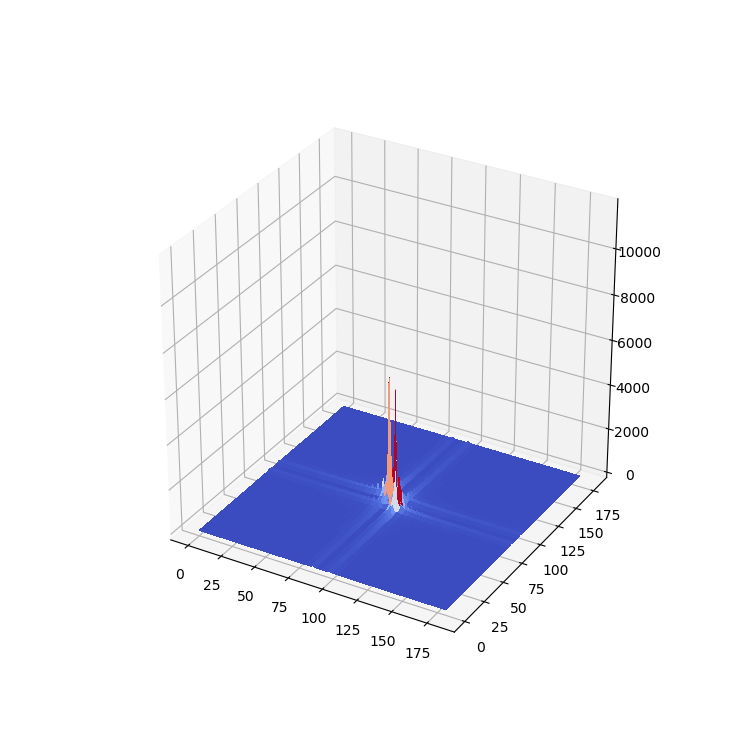

In [92]:
# Batch of Te variations - ep.2 : fe = 32fm
# 32fm sampled signal
fe = 32*fm
s45e32 = sinusoid2d(1,45,512,t0,1/fe)
showIma(s45e32)

# 32fm sampled signal - Fourier spectrum
fts45e32 = computeFT(s45e32)
surf(toVisualizeFT(fts45e32))

<IPython.core.display.Javascript object>


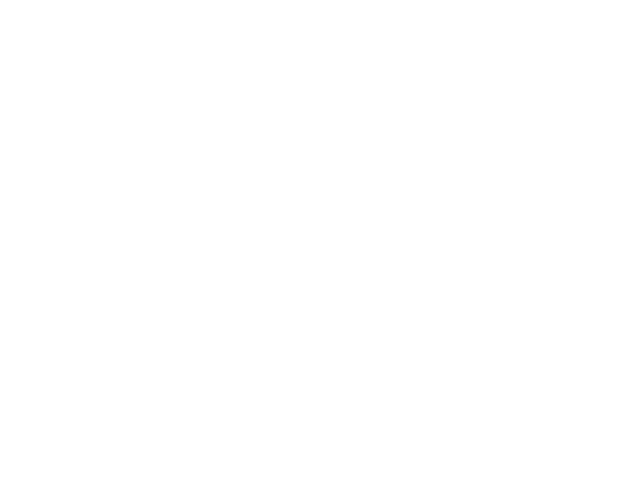

<IPython.core.display.Javascript object>


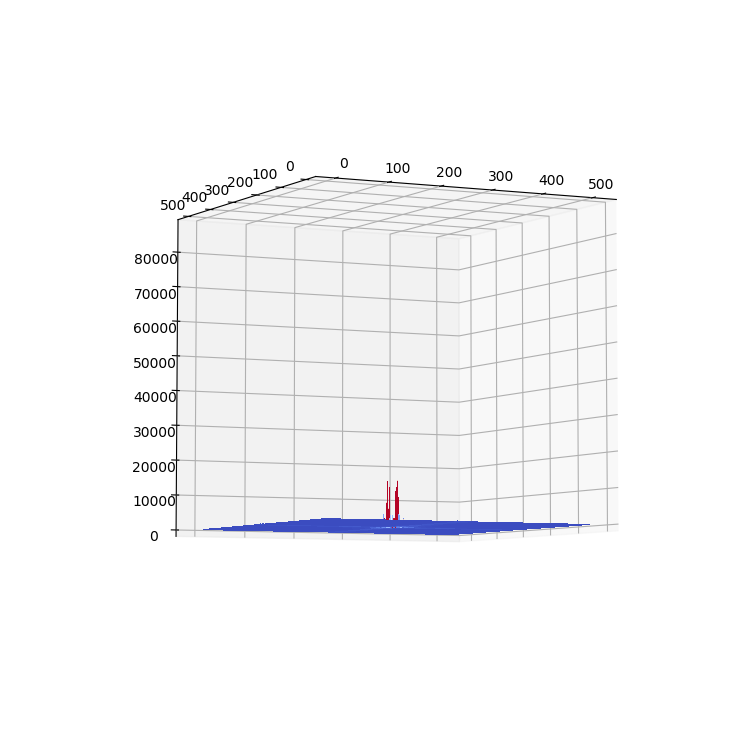

In [97]:
# Batch of Te variations - ep.3 : Te = 1 (no sampling)
showIma(s45)

# initial Fourier spectrum - no sampling
fts45 = computeFT(s45)
surf(toVisualizeFT(fts45))

The spectra above display just as they should. 
Both Dirac peaks are always utterly recognizable. 

The peaks broaden as the sampling frequency shrinks. It means that the sampling gets less and less precise. On the other hand, high sampling frequencies lead to very thin peaks, which are close in shape to what we theoretically get in the continuous case ($\delta_0$ = $\infty$).
When displayed, the spectrum of the original image gives two very high and narrow peaks that almost disappear onto the graph. Considering the signal without any sampling is indeed the closest to the "ideal" continuous signal.

The extra lobe structures that one notices around the peaks are linked to the superposition of sinc functions onto the spectrum, due to the representation paradigm that is not able to show an "actual" Dirac distribution. We are, indeed, working in a world of discrete values.

<IPython.core.display.Javascript object>


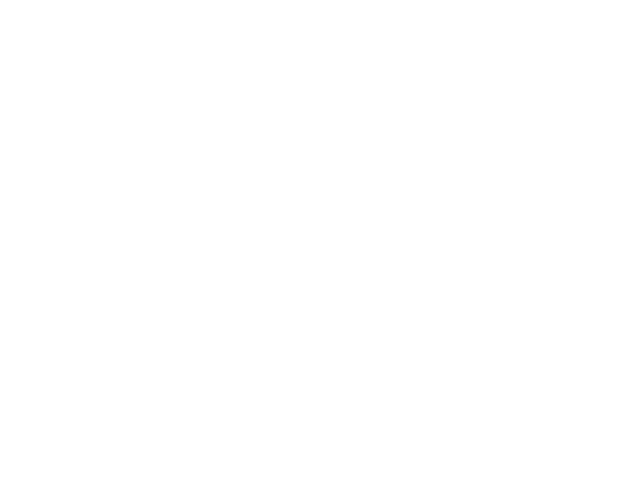

<IPython.core.display.Javascript object>


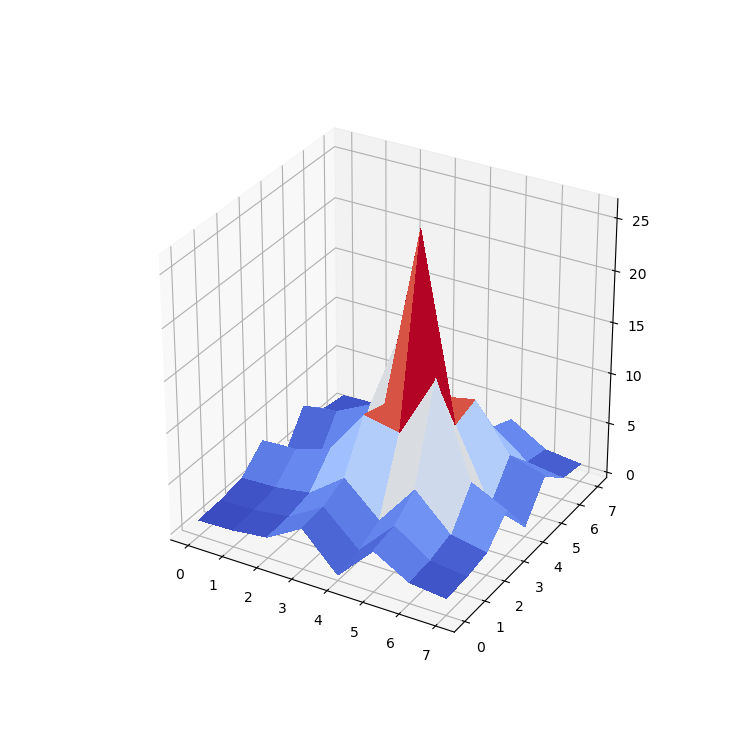

In [120]:
# period increased
t0 = 750
f0 = 1/t0
fm = f0*np.sqrt(2)/2

# 16fm sampled signal
fe = 16*fm
s45e32 = sinusoid2d(1,45,512,t0,1/fe)
showIma(s45e32)

# 16fm sampled signal - Fourier spectrum
fts45e32 = computeFT(s45e32)
surf(toVisualizeFT(fts45e32))

Excessively large periods lead to excessively narrow frequencies.
In that case, whatever the sampling rate is, the distance between two samples from the signal will be too small to be shown. The Dirac peaks will therefore fuse into a single one.

Any tentative to increase precision by augmenting $f_e$ will fail miserably (see below).

<IPython.core.display.Javascript object>


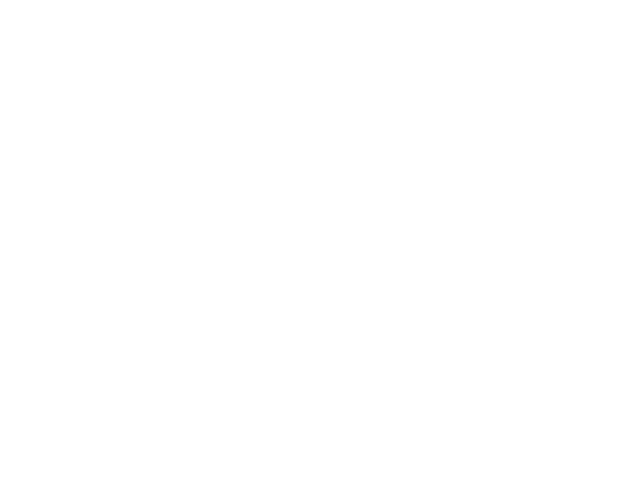

<IPython.core.display.Javascript object>


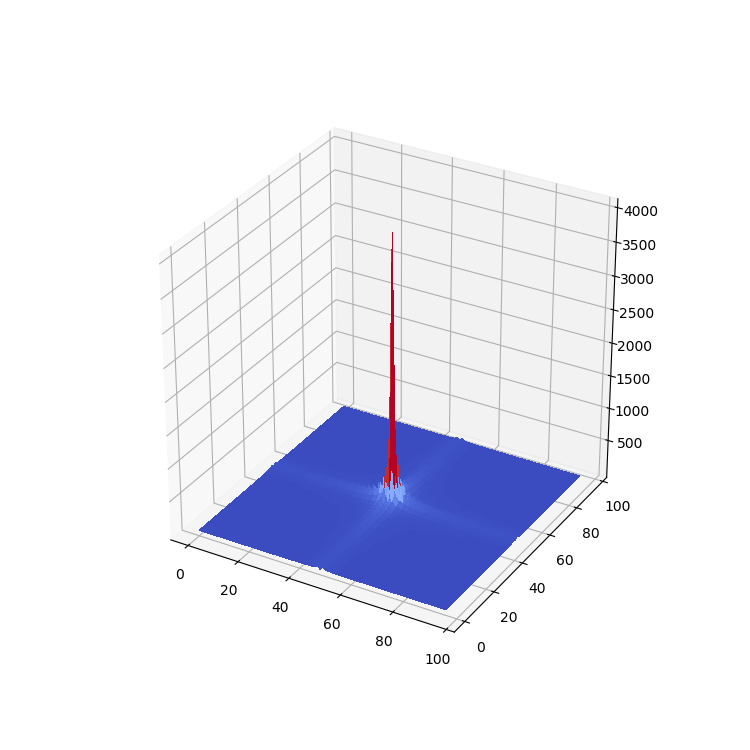

In [121]:
# period increased

# 200fm sampled signal
fe = 200*fm
s45e200 = sinusoid2d(1,45,512,t0,1/fe)
showIma(s45e200)

# 200fm sampled signal - Fourier spectrum
fts45e200 = computeFT(s45e200)
surf(toVisualizeFT(fts45e200))

4. (a) Sample $s_{45}$ with $f_0=4 f_m$ and display the sampled signal.

<IPython.core.display.Javascript object>


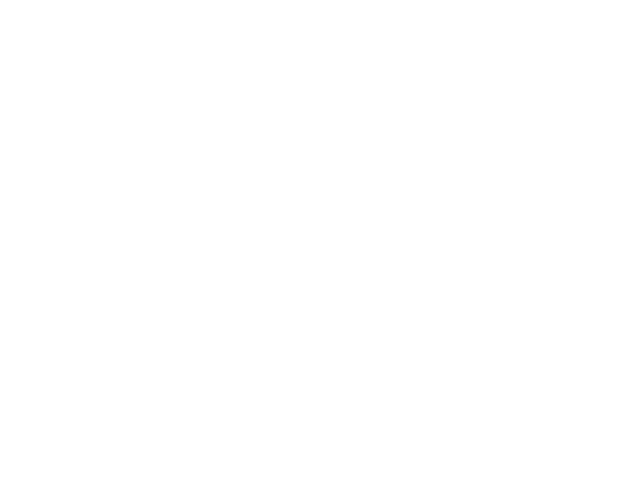

<IPython.core.display.Javascript object>


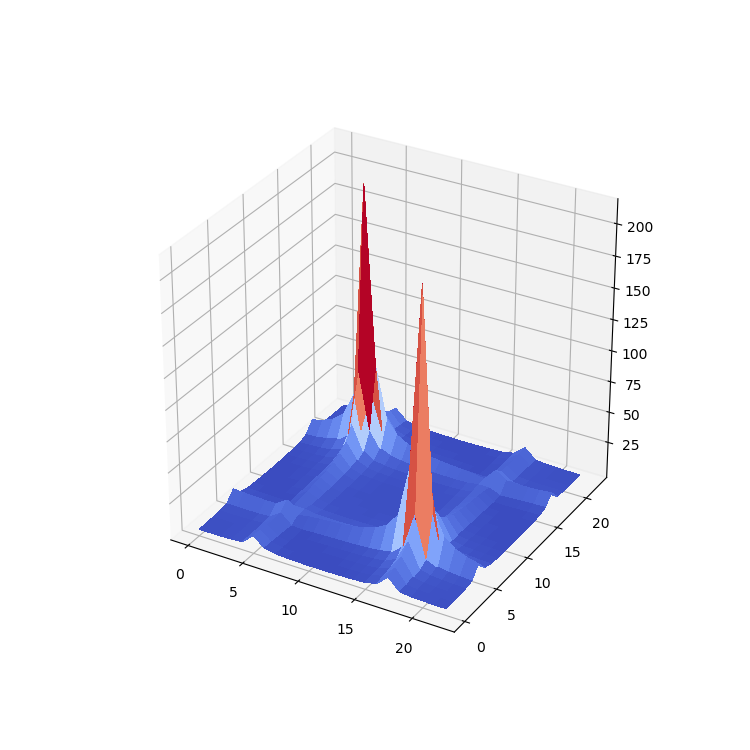

In [122]:
# back to initial period T0 = 64
t0 = 64
f0 = 1/t0
fm = f0*np.sqrt(2)/2

# 4fm sampled signal
fe = 4*fm
s45e4 = sinusoid2d(1,45,512,t0,1/fe)
showIma(s45e4)

# 4fm sampled signal - Fourier spectrum
fts45e4 = computeFT(s45e4)
surf(toVisualizeFT(fts45e4))

4. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [123]:
def error(xd,xr,A,L):
    sum = 0
    for k in range(L):
        for l in range(L):
            sum += np.abs(xr[k][l] - xd[k][l])

    return 1/(2*A*L**2)*sum

4. (c) Reconstruct the sampled signal. Display original and reconstruted signal.

Print the orignal signal. Print the relative average error between the original and reconstructed images. What is the origin of this error?

<IPython.core.display.Javascript object>


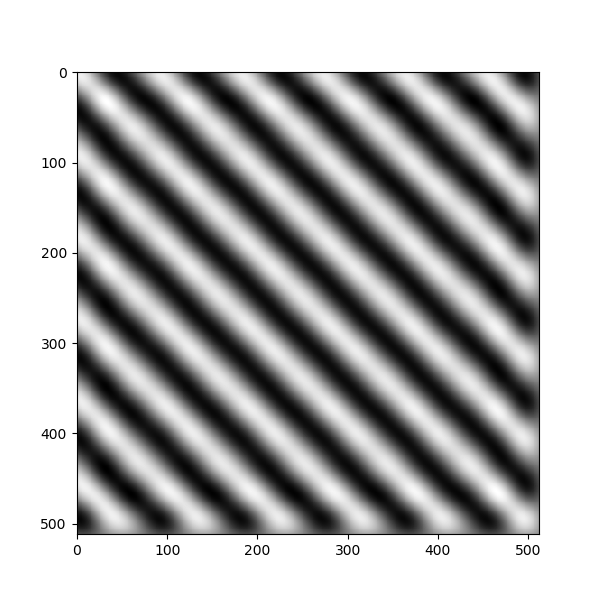

Error  0.022936924363102615


In [126]:
# fe keeps the same value
sre4 = shannonInterpolation(s45e4, 1/fe, 512)
imshow(sre4)
er = error(sre4,s45,1,512)
print("Error ", er)

Sampling leads to natural loss in the reconstructed signal, although it can be somewhat ignored in all cases where the Shannon law is fully respected (e.g. in the program above, where the resulting error is not that significant. 
Since a 4$f_m$ sampling rate is quite close to the Shannon-defined limit (2$f_m$), this result could easily be bettered by increasing it.

The reconstructed signal is visually very similar to the initial one, apart from the slight blur that appears all over it.

5. Same question than 4. with $f_e = \frac32f_m$. Comment the effects of aliasing.

<IPython.core.display.Javascript object>


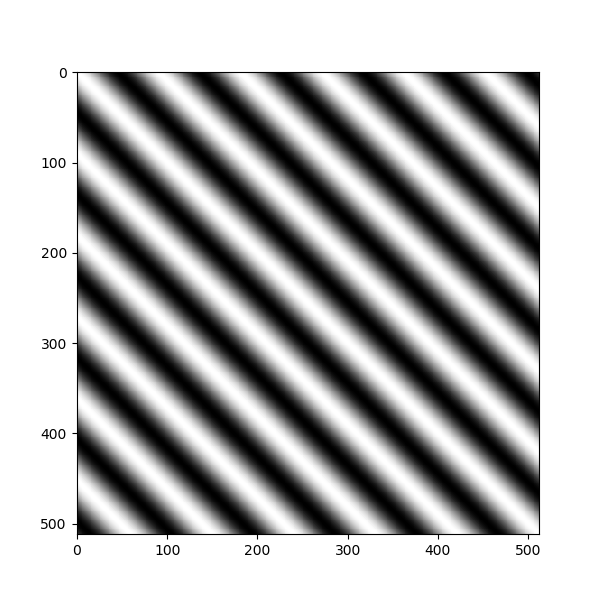

<IPython.core.display.Javascript object>


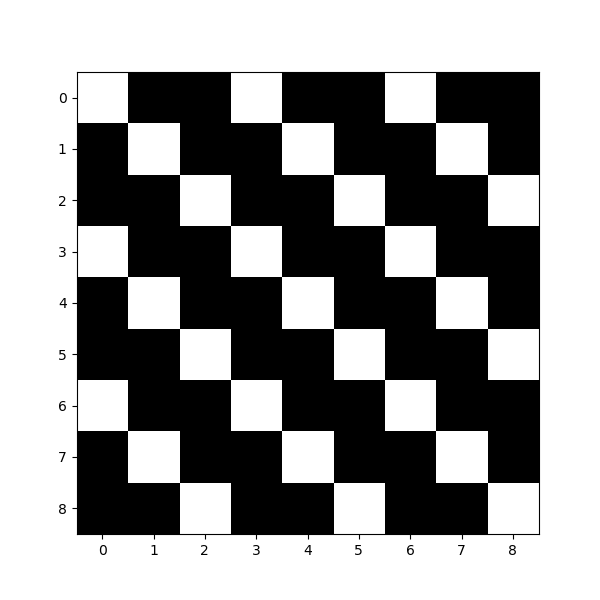

<IPython.core.display.Javascript object>


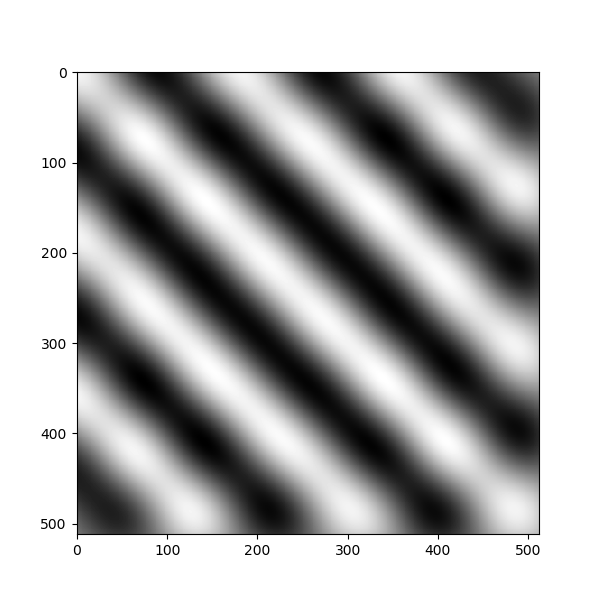

Error  0.40686264750146783


In [131]:
# 3/2fm sampled signal
fe = (3/2)*fm
s45e3div2 = sinusoid2d(1,45,512,t0,1/fe)

# reconstructing signal
sre3div2 = shannonInterpolation(s45e3div2, 1/fe, 512)

# comparison
imshow(s45)
imshow(s45e3div2)
imshow(sre3div2)
er = error(sre3div2,s45,1,512)
print("Error ", er)

The signal could not be fully reconstructed as some data is missing (this is made clear by the distribution of the stripes : they're broader than expected). The fundamental frequency of the new image is way too low.

Sampling with a frequency that does not respect the Shannon law leads to aliasing and has deplorable consequences.

A sampled signal is aliased when its original Fourier Transform (FT) could not be isolated from the sampled FT (SFT), for its successive replicas found into the SFT interfere with each other to the point of becoming indistinguishable. 

6. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_m$ what is the additional drawback appearing after the reconstruction? Explain.

<IPython.core.display.Javascript object>


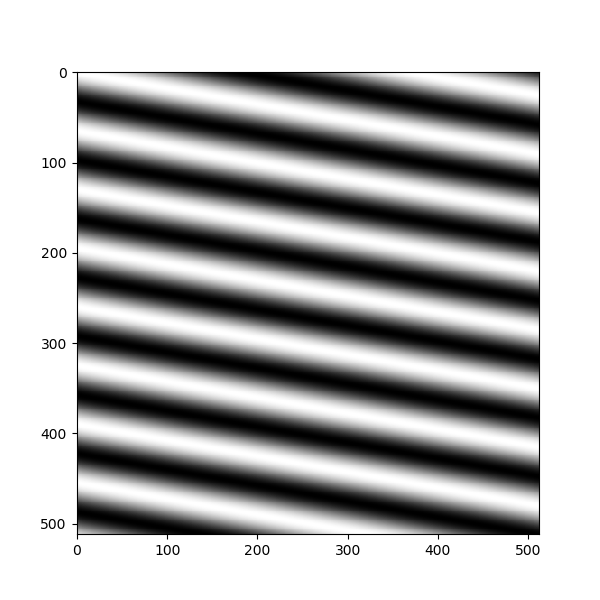

<IPython.core.display.Javascript object>


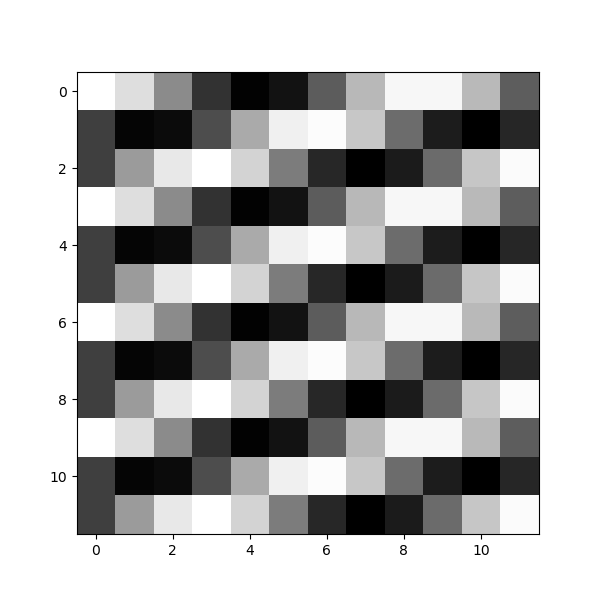

<IPython.core.display.Javascript object>


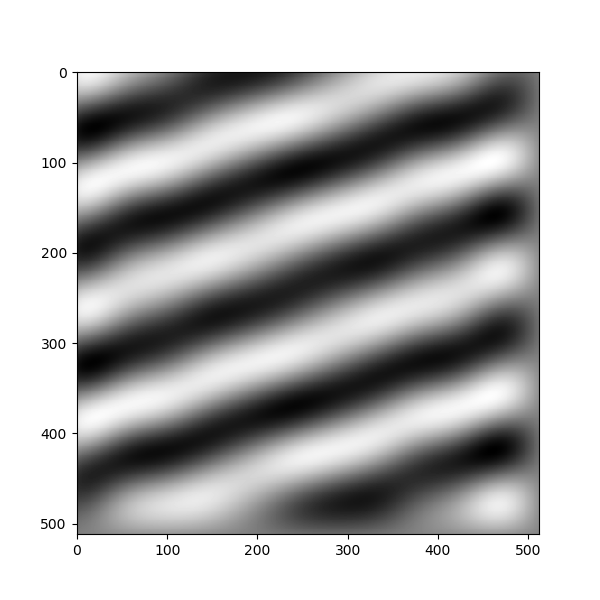

In [136]:
# 10° < 45°; therefore sin(10) < cos(10), which yields fm = f0*cos(10)
t0 = 64
f0 = 1/t0
fm = f0*np.cos(np.deg2rad(10))
fe = 3/2*fm

# creating original signal
s10 = sinusoid2d(1,10,512,t0,1)

# 3/2fm sampled signal
s10e3div2 = sinusoid2d(1,10,512,t0,1/fe)

# reconstructing signal
sr10 = shannonInterpolation(s10e3div2, 1/fe, 512)

# comparison
imshow(s10)
imshow(s10e3div2)
imshow(sr10)
er10 = error(sr10,s10,1,512)

The sampling was too ambiguous as for the stripes' direction, even for the human eye.
Hence, the reconstruction function has totally lost trace of the initial orientation - in addition to having, as expected, a wrong fundamental frequency in the reconstructed image.
Once again, the black and white stripes are too broad and too sparse. 

7. Bonus question: write a function `shannonInterpolationLoop()` implementing equation (1) using two loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Run time may be measured using `tic()` and `tac()` functions.

In [8]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

    
    def shannonInterpolation(I, Te, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Te-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Te-y)
    return np.matmul(X.T, np.matmul(I, Y))

### your code starts below
def shannonInterpolationLoop(I,Te,size):
    arr=np.zeros((I.shape[0],I.shape[1]))
    for k in range(I.shape[0],I.shape[1]):
        for l in range(size):
            arr[k][l] += I[k*Te][l*Te]*np.sinc(1/Te())*np.sinc(1/Te())
    return arr

In [9]:
t0 = 64
f0 = 1/t0
fm = f0*np.sqrt(2)/2
fe = 16*fm

ssmall = sinusoid2d(1,45,64,t0,1/fe)

reconsmall = shannonInterpolation(ssmall, 1/fe, 64)
reconloopsmall = shannonInterpolationLoop(ssmall, 1/fe, 64)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices


## Exercice 2: aliasing on natural images

In this exercice, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

In [139]:
from PIL import Image

barbara = np.array(Image.open('img/barbara.png'))

def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

FileNotFoundError: [Errno 2] No such file or directory: 'img/barbara.png'

1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

A subsample of factor 2 retains only one pixel out of every pair from the initial image.

2. Write a code that
 - iterates the subsampling process
 - computes the Fourier transform at each iteration, including the original image; and displays frequencies

   Describe and interpret the effects of aliasing. Why is aliasing a drawback ?

In [138]:
imb = barbara.copy()
showIma(imb)
fb = fft2(imb)
fb = toVisualizeLogFT(fb)
showIma(fb)
for i in range (8):
    imb = subSample2(imb)
    showIma(imb)
    fb = fft2(imb)
    fb = toVisualizeLogFT(fb)
    showIma(fb)

NameError: name 'barbara' is not defined

3. Bonus question: same question with the image `img/mandrill.png`.

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


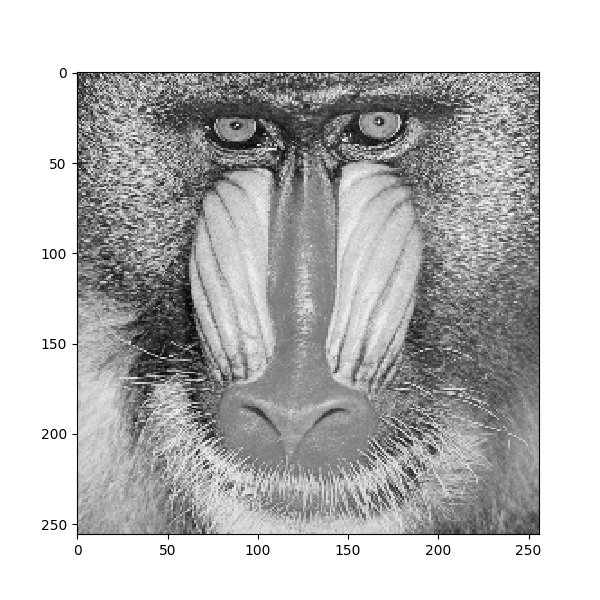

<IPython.core.display.Javascript object>


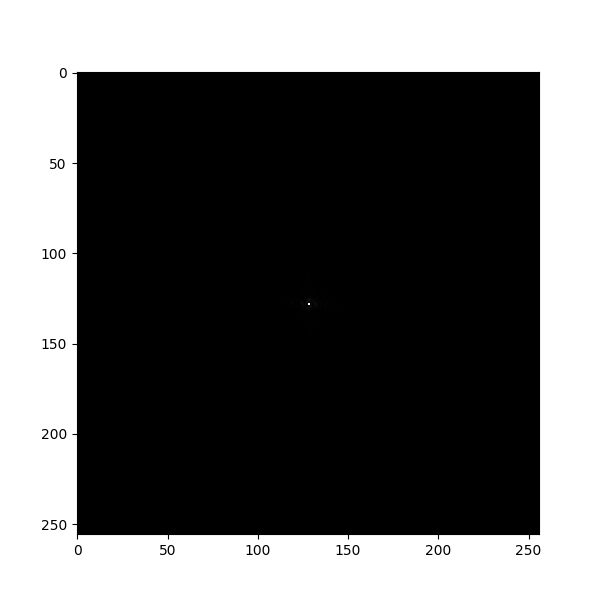

<IPython.core.display.Javascript object>


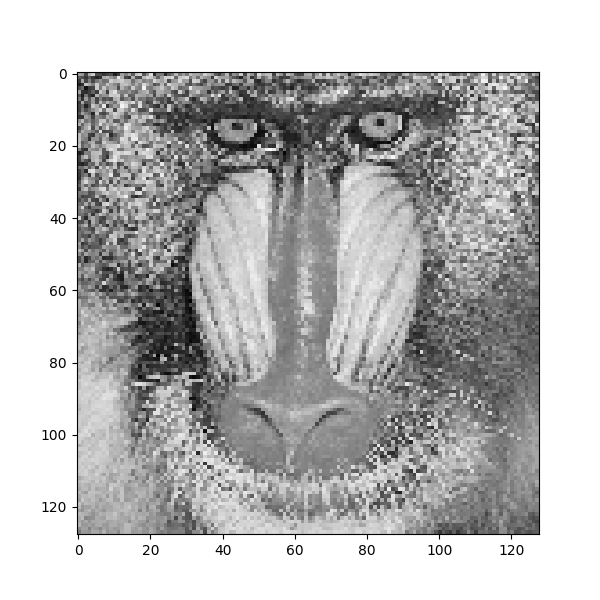

<IPython.core.display.Javascript object>


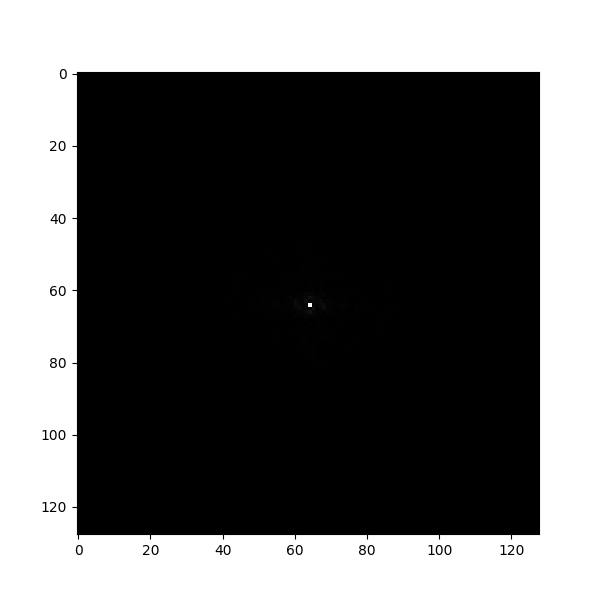

<IPython.core.display.Javascript object>


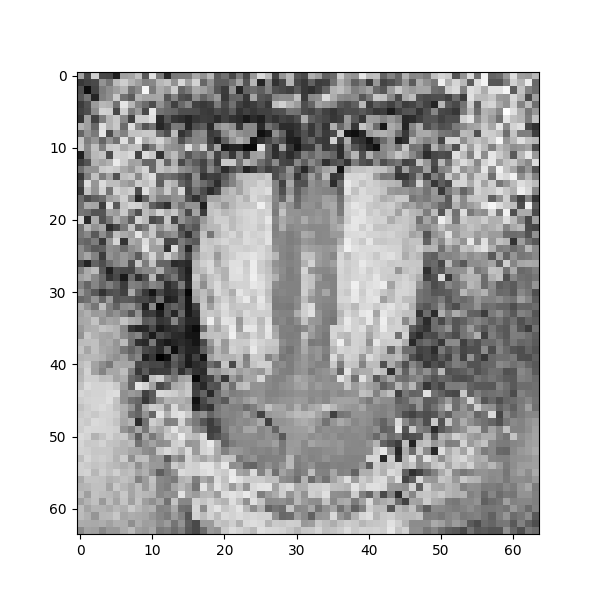

<IPython.core.display.Javascript object>


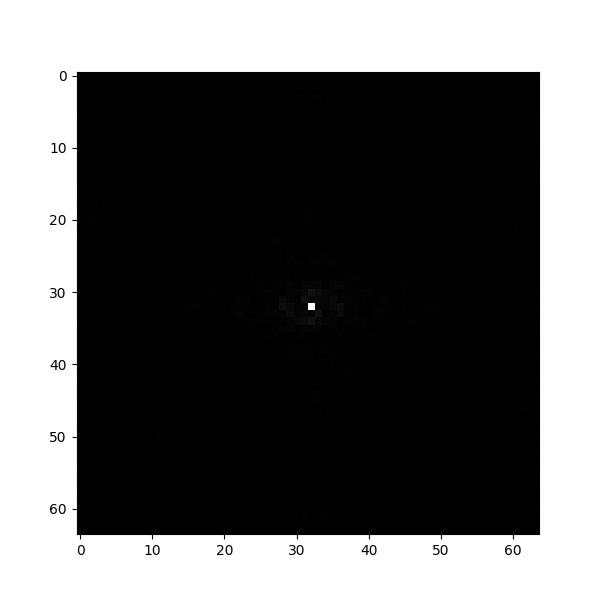

<IPython.core.display.Javascript object>


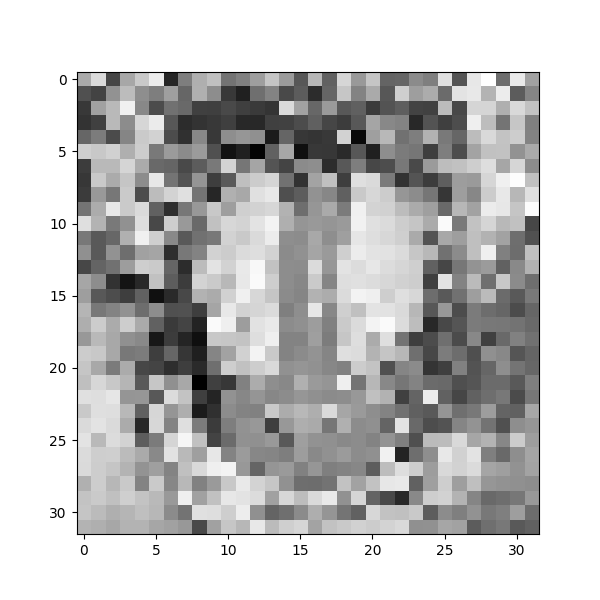

<IPython.core.display.Javascript object>


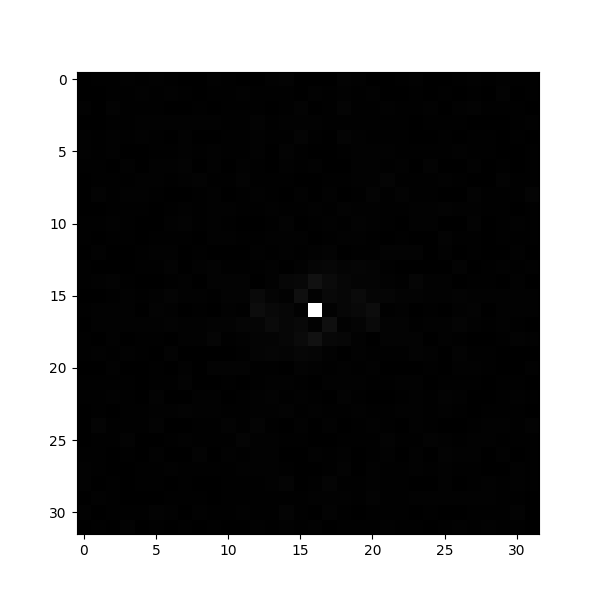

<IPython.core.display.Javascript object>


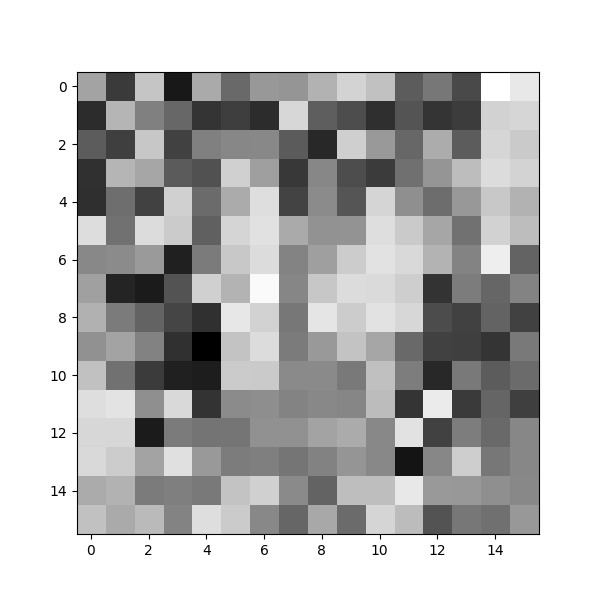

<IPython.core.display.Javascript object>


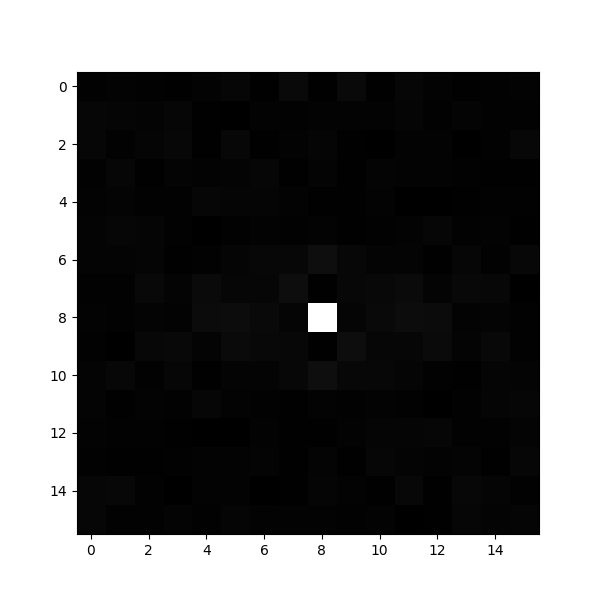

<IPython.core.display.Javascript object>


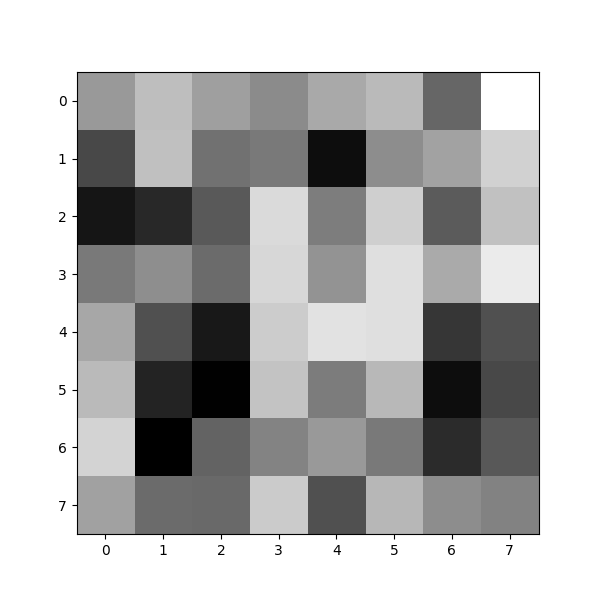

<IPython.core.display.Javascript object>


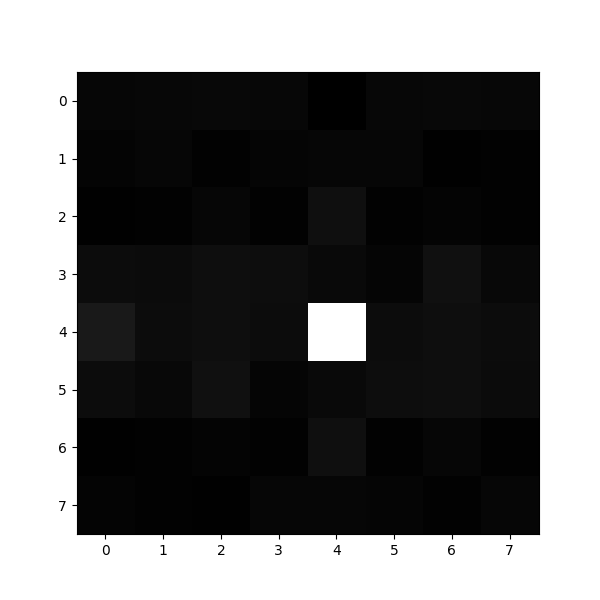

<IPython.core.display.Javascript object>


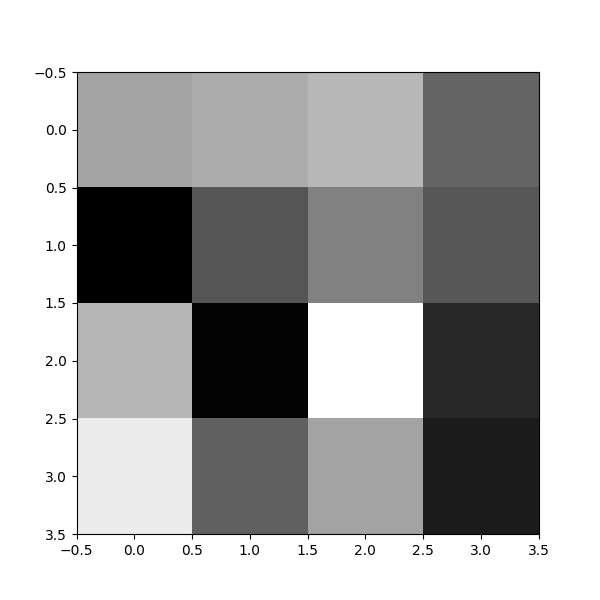

<IPython.core.display.Javascript object>


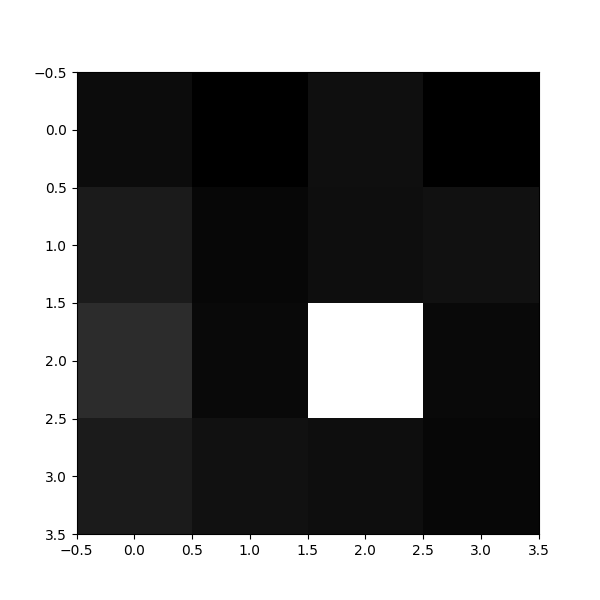

<IPython.core.display.Javascript object>


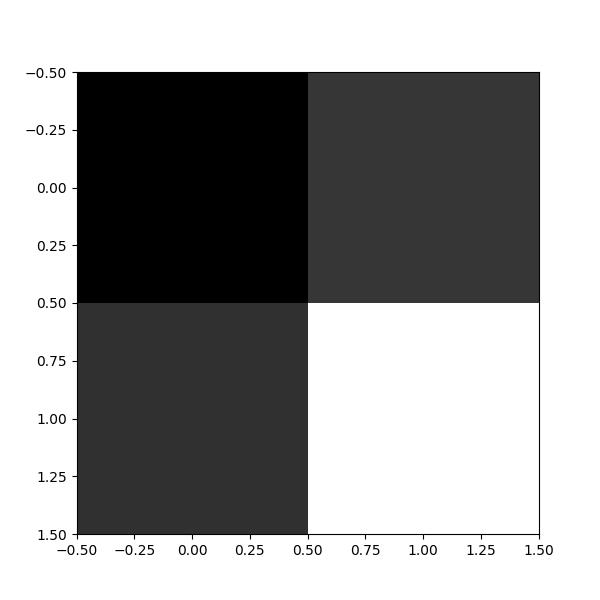

<IPython.core.display.Javascript object>


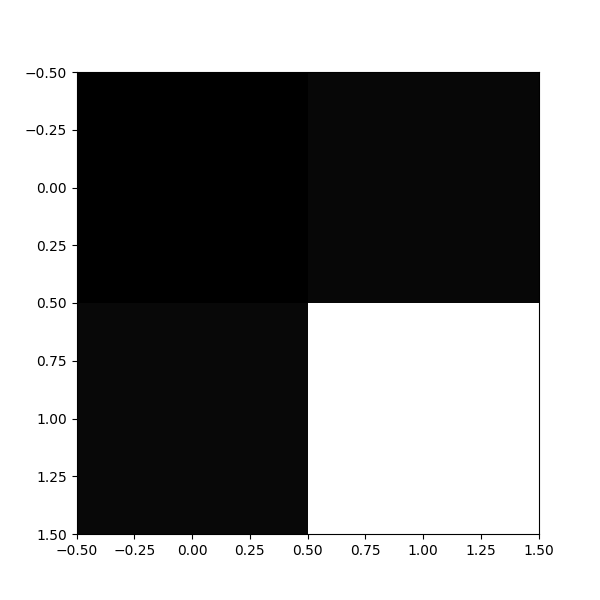

In [33]:
mandrill = np.array(Image.open('img/mandrill.png'))

imm = mandrill.copy()
showIma(imm)
fm = fft2(imm)
fm = toVisualizeLogFT(fm)
showIma(fm)
for i in range (8):
    imm = subSample2(imm)
    showIma(imm)
    fm = fft2(imm)
    fm = toVisualizeLogFT(fm)
    showIma(fm)